# Linear Regression with Python

---

**Problem Statement**: To decide for an ecommerce company whether to focus their efforts on their mobile app experience or their website


&nbsp;


**Solution by**: *Aditya Karanth*.

**GitHub Profile**: https://github.com/Aditya-Karanth

**Kaggle Profile**: https://www.kaggle.com/adityakaranth



<h3>Project Planning :</h3> 

  - **Exploratory Data Analysis (EDA) -**
    - Understand nature of the data *.info()*, *.describe()*
    - Plotting Jointplots for bivariate numeric data.
    - Plotting Pairplots for multivariate numeric data.
    - Understand the correlation between features using heatmaps.
    
  - **Data Preprocessing -**
    - Removing unwanted columns eg. Email, Address, and their color Avatar.
    
  - **Training and Testing the Model**:
    - Splitting test_train data.
    - Regression using *Linear Regression*.
    - Scatter plot of y_true and predicted values
    - Evaluation of Regression model with *RMSE*.
    - Obtaining *coefficients* of the model 
    - Plotting a histogram of the residuals.

  - **Conclusion**
    - Interpretation the coefficients.
    - Solution to the problem Statement.



# Imports

In [72]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (10,6)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
# Reading csv file to customers
customers = pd.read_csv('Ecommerce Customers')

# Exploratory Data Analysis

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [22]:
# Get numeric columns
num_cols = customers.select_dtypes(include=[np.number]).columns.values
print('Numeric cols :',num_cols)

Numeric cols : ['Avg. Session Length' 'Time on App' 'Time on Website'
 'Length of Membership' 'Yearly Amount Spent']


In [23]:
# Get Categorial columns
cat_cols = customers.select_dtypes(exclude=[np.number]).columns.values
print('Categorical cols :',cat_cols)

Categorical cols : ['Email' 'Address' 'Avatar']


In [42]:
# Check for missing data
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

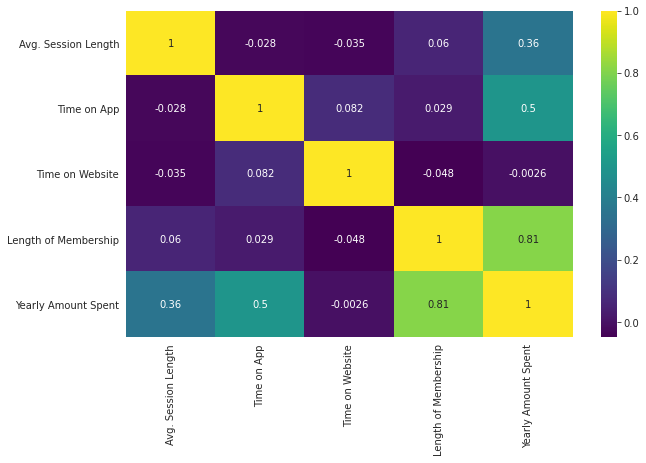

In [49]:
sns.heatmap(customers.corr(), annot=True, cmap='viridis')

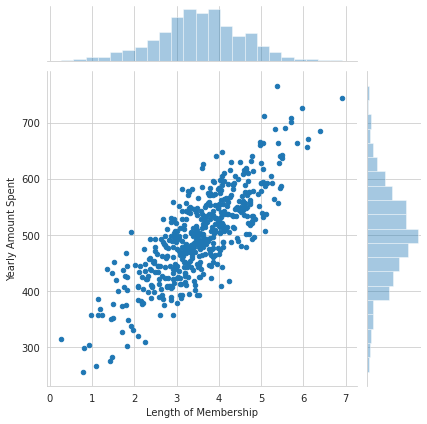

In [57]:
# As from above heatmap we can see 'Length of Membership' have high correlation with 'Yearly Amount Spent'
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers, s=20)

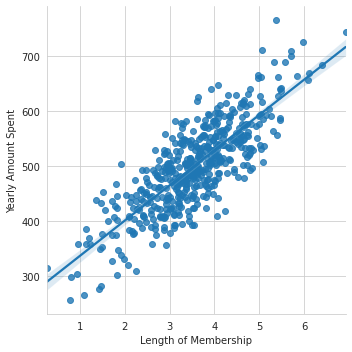

In [58]:
# Lets see how a linear model fits the data
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

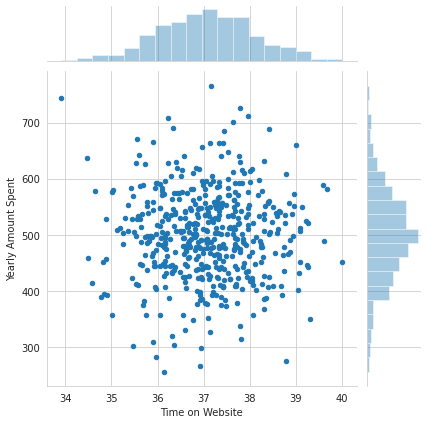

In [45]:
# Comparing the Time on Website and Yearly Amount Spent columns to check the correlation make sense
# As more time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers, s=20)

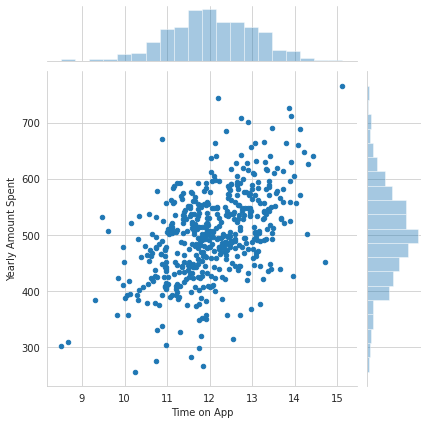

In [52]:
# Comparing the Time on App and Yearly Amount Spent columns to check the correlation make sense
# As more time on site, more money spent.
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, s=20)

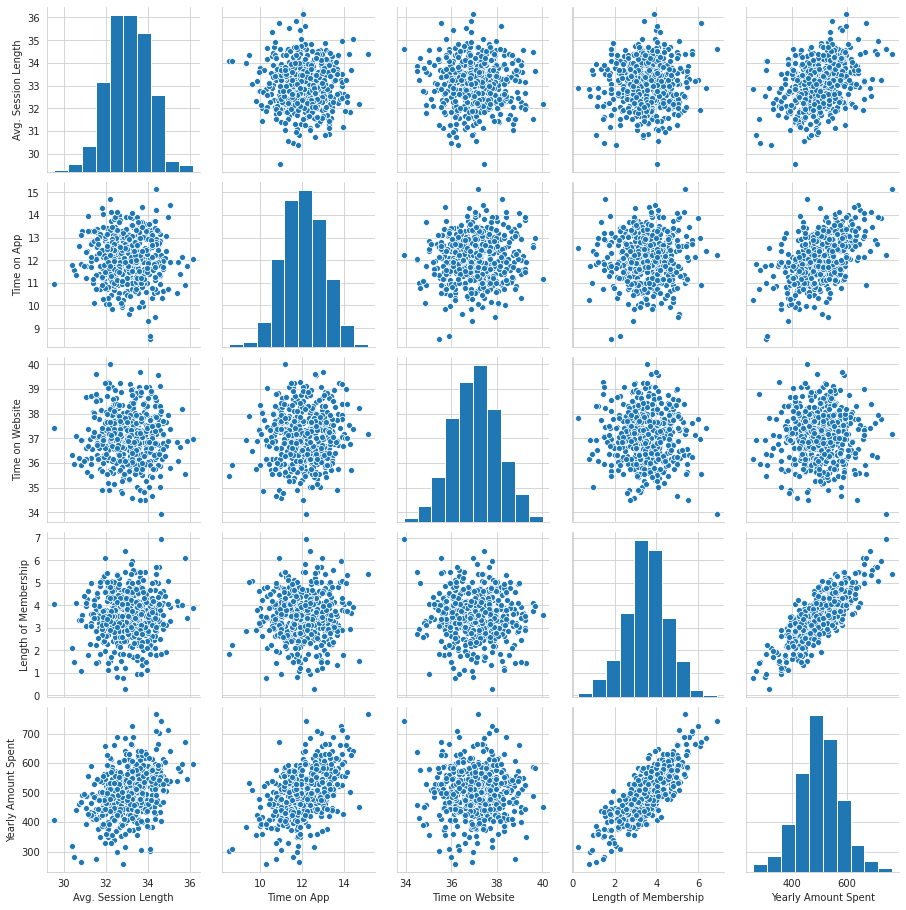

In [54]:
# Visualizing Multivariate relations via Pairplot
sns.pairplot(customers)

# Data Preprocessing

In [59]:
# Lets verify the categorical columns again
print(cat_cols)

['Email' 'Address' 'Avatar']


In [61]:
# We can either Feature Engineer these columns or drop them
customers[cat_cols]

,Email,Address,Avatar
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine
...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal


In [81]:
# Dropping above 'cat_cols'
# customers.drop(cat_cols,axis=1,inplace=True)
display(customers)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


# Training and Testing the Model


In [ ]:
num_cols

array(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'], dtype=object)

In [ ]:
# All num_cols are features and 'Yearly Amount Spent' is the target
X = customers.drop('Yearly Amount Spent', axis=1)
y = customers['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [69]:
# Model Training
lr = LinearRegression()
lr .fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predicted')

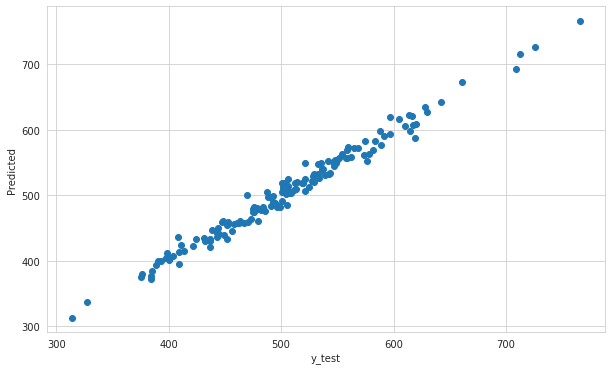

In [70]:
# Scatter plot of y_true and predicted values
predicted = lr.predict(X_test)
plt.scatter(y_test,predicted)
plt.xlabel('y_test')
plt.ylabel('Predicted')

In [74]:
# Evaluation of Regression model
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

RMSE: 10.019995508277908


In [76]:
# The coefficients of the model
print('Coefficients: ', lr.coef_)

Coefficients:  [25.41604197 38.48171869  0.92577581 61.94745709]


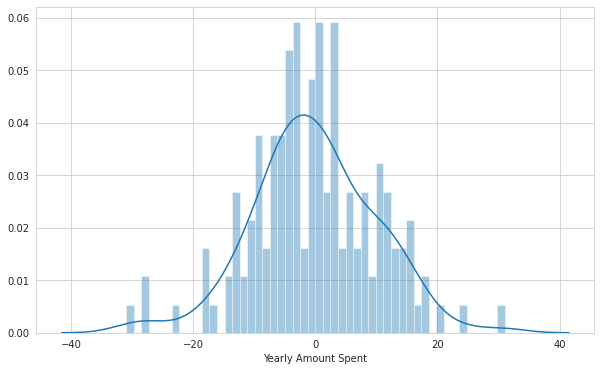

In [78]:
# Residuals
# Plotting a histogram of the residuals and it looks normally distributed
sns.distplot((y_test-predicted),bins=50)

# Conclusion

We still want to figure out the answer to the original question.

Do we focus our efforts on mobile app or website development?

In [82]:
# Let's see if we can interpret the coefficients at all to get an idea
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
display(coeffecients)

,Coeffecient
Avg. Session Length,25.416042
Time on App,38.481719
Time on Website,0.925776
Length of Membership,61.947457


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.41 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.48 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.92 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.94 total dollars spent**.

Looking at above, 

Definitely, Membership Time is what is really important!

But to answer the Problem statement, there are two ways to think about this: 
- Develop the Website to catch up to the performance of the mobile app 
> or 
- Develop the app more since that is what is working better. 

The actual answer really depends on the other factors going on at the company and the above are our insights.